plotting pid as a function of prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from torchmetrics import ConfusionMatrix
import torch
#path_to_db = "/groups/icecube/peter/storage/Multiclassification/Test/last_one_lvl3MC/dynedge_pid_test_run/results.csv"
path_to_db = "/groups/icecube/peter/storage/Multiclassification/Real/last_one_lvl3MC/dynedge_pid_Real_run_21.5_mill_equal_frac_second_/results.csv"
path_to_db = "/groups/icecube/petersen/GraphNetDatabaseRepository/example_results/train_classification_model/last_one_lvl3MC/dynedge_pid_example/results.csv"
feature_data = pd.read_csv(path_to_db, index_col=[0])

/groups/icecube/qgf305/anaconda3/envs/graphnet/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
preds = ["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]
pids = [1,12,13]

In [3]:
print("unique particle ID's and their count: \n", feature_data[["pid_noise_pred","pid"]].groupby("pid").count())
print()
print("data:")
feature_data

unique particle ID's and their count: 
        pid_noise_pred
pid                  
-16.0            1000
-14.0            1132
-12.0            1064
-1.0            10999
 12.0            2520
 13.0           11090
 14.0            2535
 16.0            2660

data:


,pid_noise_pred,pid_muon_pred,pid_neutrino_pred,pid,event_no
0,1.158475e-08,0.998674,0.001326,13.0,70303953.0
1,6.296498e-07,0.962749,0.037251,13.0,70834217.0
2,8.062494e-01,0.014907,0.178844,-1.0,47840380.0
3,4.564216e-12,0.987746,0.012254,13.0,89703021.0
4,9.455863e-06,0.987323,0.012667,13.0,81500837.0
...,...,...,...,...,...
32995,6.928816e-03,0.001326,0.991746,16.0,72783503.0
32996,2.568107e-05,0.185457,0.814518,14.0,28491557.0
32997,9.150535e-01,0.001142,0.083805,16.0,51018639.0
32998,2.543411e-02,0.001790,0.972775,12.0,61500370.0


In [4]:
## transform data
# remove anti
feature_data['pid'] = feature_data['pid'].apply(abs)
# make all neutrinos the same class; to match training classes
feature_data.loc[feature_data['pid']==14, "pid"]=12
feature_data.loc[feature_data['pid']==16, "pid"]=12

In [5]:
print("unique particle ID's and their count: \n", feature_data[["pid_noise_pred","pid"]].groupby("pid").count())
print()
print("data:")
feature_data

unique particle ID's and their count: 
       pid_noise_pred
pid                 
1.0            10999
12.0           10911
13.0           11090

data:


,pid_noise_pred,pid_muon_pred,pid_neutrino_pred,pid,event_no
0,1.158475e-08,0.998674,0.001326,13.0,70303953.0
1,6.296498e-07,0.962749,0.037251,13.0,70834217.0
2,8.062494e-01,0.014907,0.178844,1.0,47840380.0
3,4.564216e-12,0.987746,0.012254,13.0,89703021.0
4,9.455863e-06,0.987323,0.012667,13.0,81500837.0
...,...,...,...,...,...
32995,6.928816e-03,0.001326,0.991746,12.0,72783503.0
32996,2.568107e-05,0.185457,0.814518,12.0,28491557.0
32997,9.150535e-01,0.001142,0.083805,12.0,51018639.0
32998,2.543411e-02,0.001790,0.972775,12.0,61500370.0


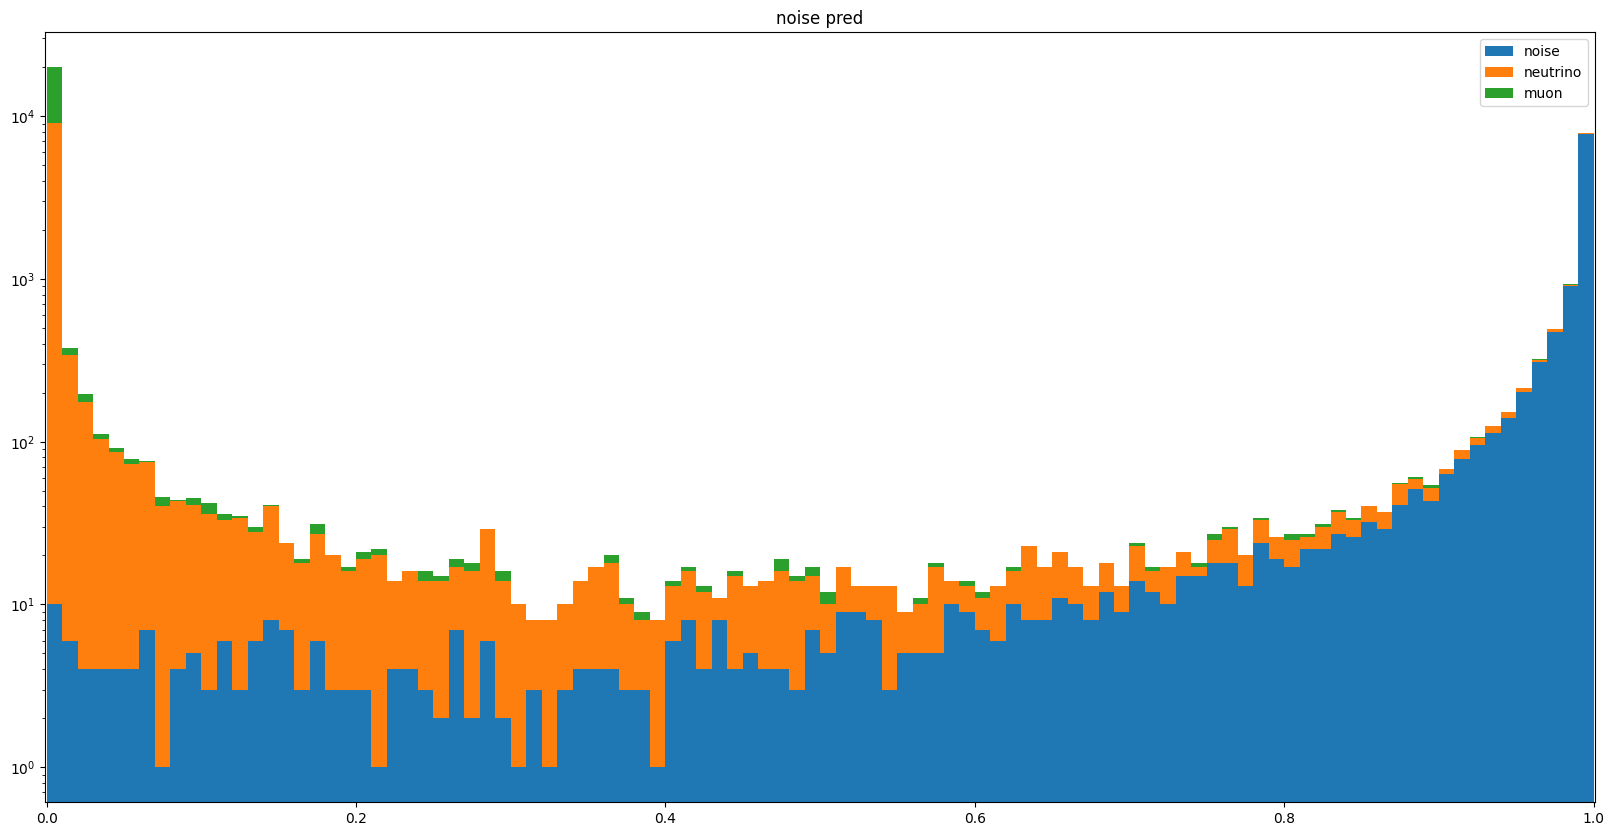

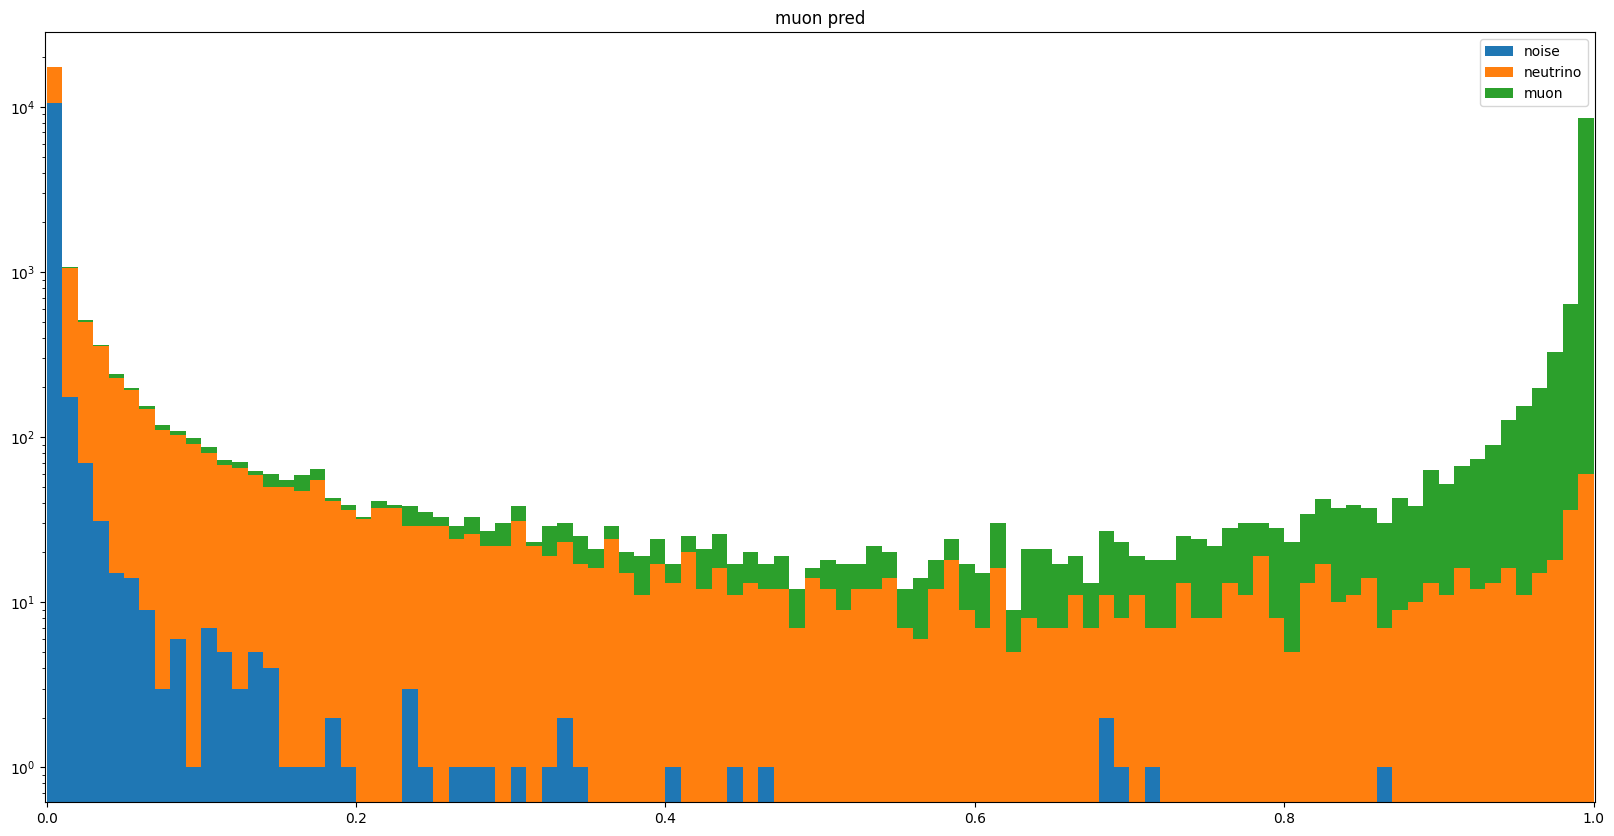

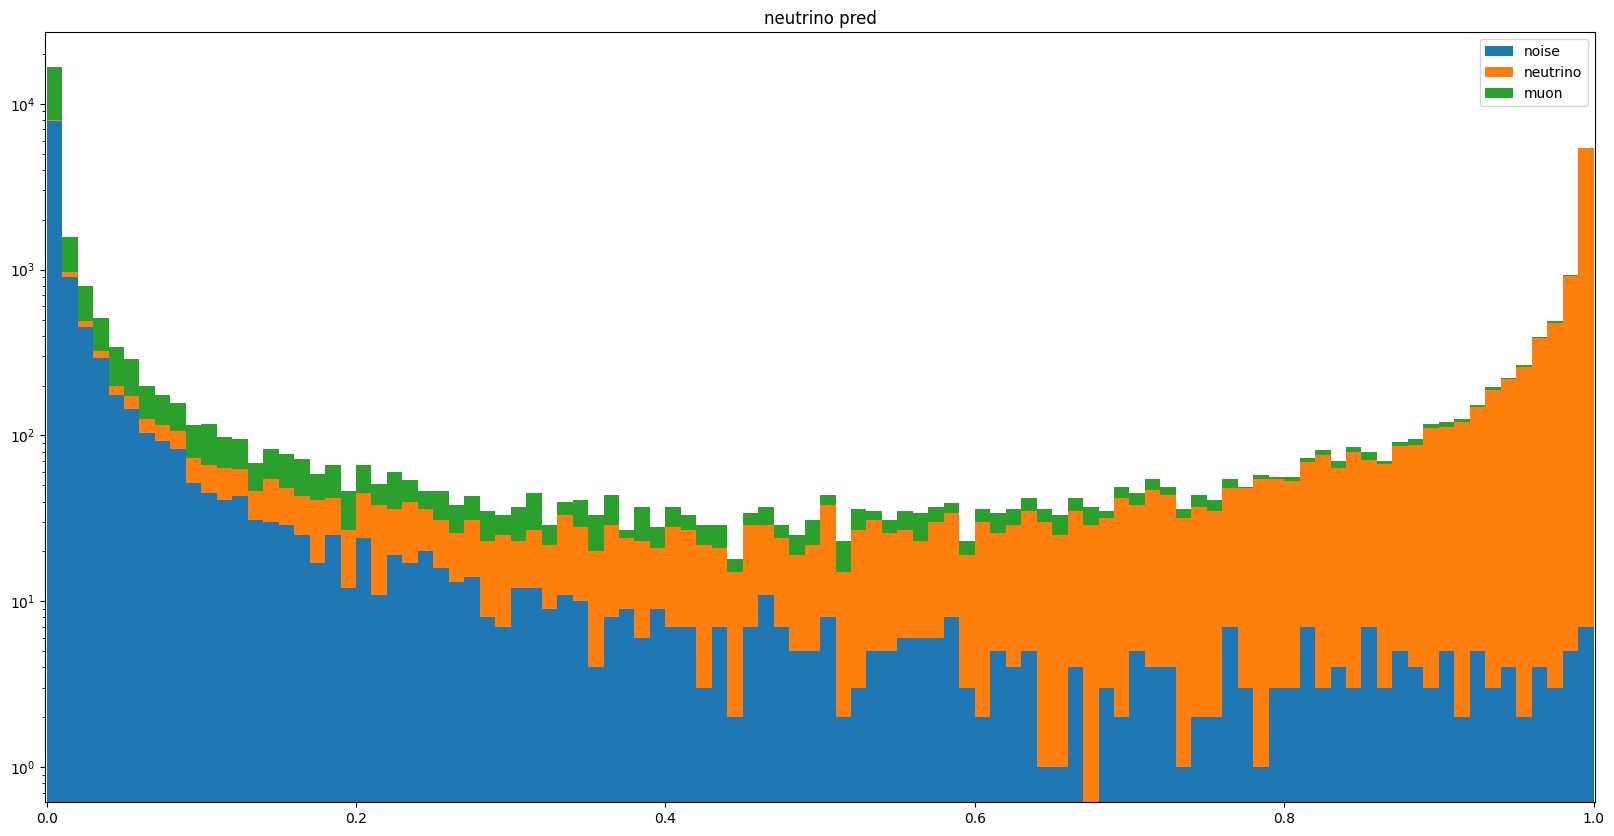

In [6]:

preds = ["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]
pids = [1,12,13]
color=["b","y","g"]
for i, pred in enumerate(preds):
    pid_list=[]
    pid_bin_centers=[]
    
    fig,ax = plt.subplots(figsize=(20,10))

    temp = 0
    for i, pid in enumerate(pids):
        y, bin_edges = np.histogram(feature_data[pred].loc[feature_data["pid"]==pid], bins=50)
        
        pid_list.append(feature_data[pred].loc[feature_data["pid"]==pid])
        pid_bin_centers.append(0.5*(bin_edges[1:] + bin_edges[:-1]))
    
    ax.hist(pid_list, bins=100, log=True, stacked=True, label=("noise", "neutrino", "muon"))
    ax.set(yscale='log')
    ax.set_xlim(-0.001,1.001)
    #ax.set(ylabel='Rate',yscale='log')
    #ax.yaxis.set_major_formatter(ticker.EngFormatter(unit='Hz'))
    #for i, _ in enumerate(pids):
    #    plt.errorbar(pid_bin_centers[i], pid_histlist[i], yerr = stds[i], fmt=f".{color[i]}")
    plt.title(pred.replace("_"," ")[4:])
    plt.legend()
    plt.savefig("/groups/icecube/qgf305/workspace/analyses/multi_classification_on_stop_and_track_muons/plotting/distributions/test_plot/"+pred.replace("_","")[3:-4]+".png")

In [ ]:
feature_data["pid"].loc[feature_data[["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]].max(axis=1)]

In [39]:


preds = feature_data[["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]].copy(deep=True)

preds["pid_noise_pred"] = preds["pid_noise_pred"].loc[feature_data["pid_noise_pred"] > feature_data["pid_muon_pred"]] = 1
preds

/tmp/ipykernel_14541/1288578722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds["pid_noise_pred"] = preds["pid_noise_pred"].loc[feature_data["pid_noise_pred"] > feature_data["pid_muon_pred"]] = 1


,pid_noise_pred,pid_muon_pred,pid_neutrino_pred
0,1,0.000000,0.000000e+00
1,1,1.000000,3.906106e-07
2,1,1.000000,1.306228e-07
3,1,0.022993,6.104581e-01
4,1,0.017270,7.054196e-01
...,...,...,...
7424995,1,0.000000,0.000000e+00
7424996,1,0.916026,8.397368e-02
7424997,1,0.008736,3.558680e-01
7424998,1,0.650760,3.409231e-01


In [21]:

preds = torch.tensor(feature_data[["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]].values)
target = torch.tensor(feature_data["pid"].astype(int).values)
target.size()

torch.Size([7425000])

In [25]:
confmat = ConfusionMatrix(num_classes=3)
confmat(preds, target)

ValueError: The highest label in `target` should be smaller than the size of the `C` dimension of `preds`.